In [ ]:
#in this block of code we are importing the libraries that will be required further
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#loading the csv file
df = pd.read_csv('/content/alzheimers_disease_data.csv')
df.head().T

,0,1,2,3,4
PatientID,4751,4752,4753,4754,4755
Age,73,89,73,74,89
Gender,0,0,0,1,0
Ethnicity,0,0,3,0,0
EducationLevel,2,0,1,1,0
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0,0,0,1,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498


In [ ]:
# Data preprocessing
#Drop unnecessary columns from the DataFrame
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

# Identify numerical columns: columns with more than 10 unique values are considered numerical
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]
print(f"Numerical columns: ", numerical_columns)

# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()
print(f"Categorical columns: ", categorical_columns)

Numerical columns:  ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
Categorical columns:  ['BehavioralProblems', 'CardiovascularDisease', 'Confusion', 'Depression', 'Diabetes', 'DifficultyCompletingTasks', 'Disorientation', 'EducationLevel', 'Ethnicity', 'FamilyHistoryAlzheimers', 'Forgetfulness', 'Gender', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'PersonalityChanges', 'Smoking']


In [ ]:
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}




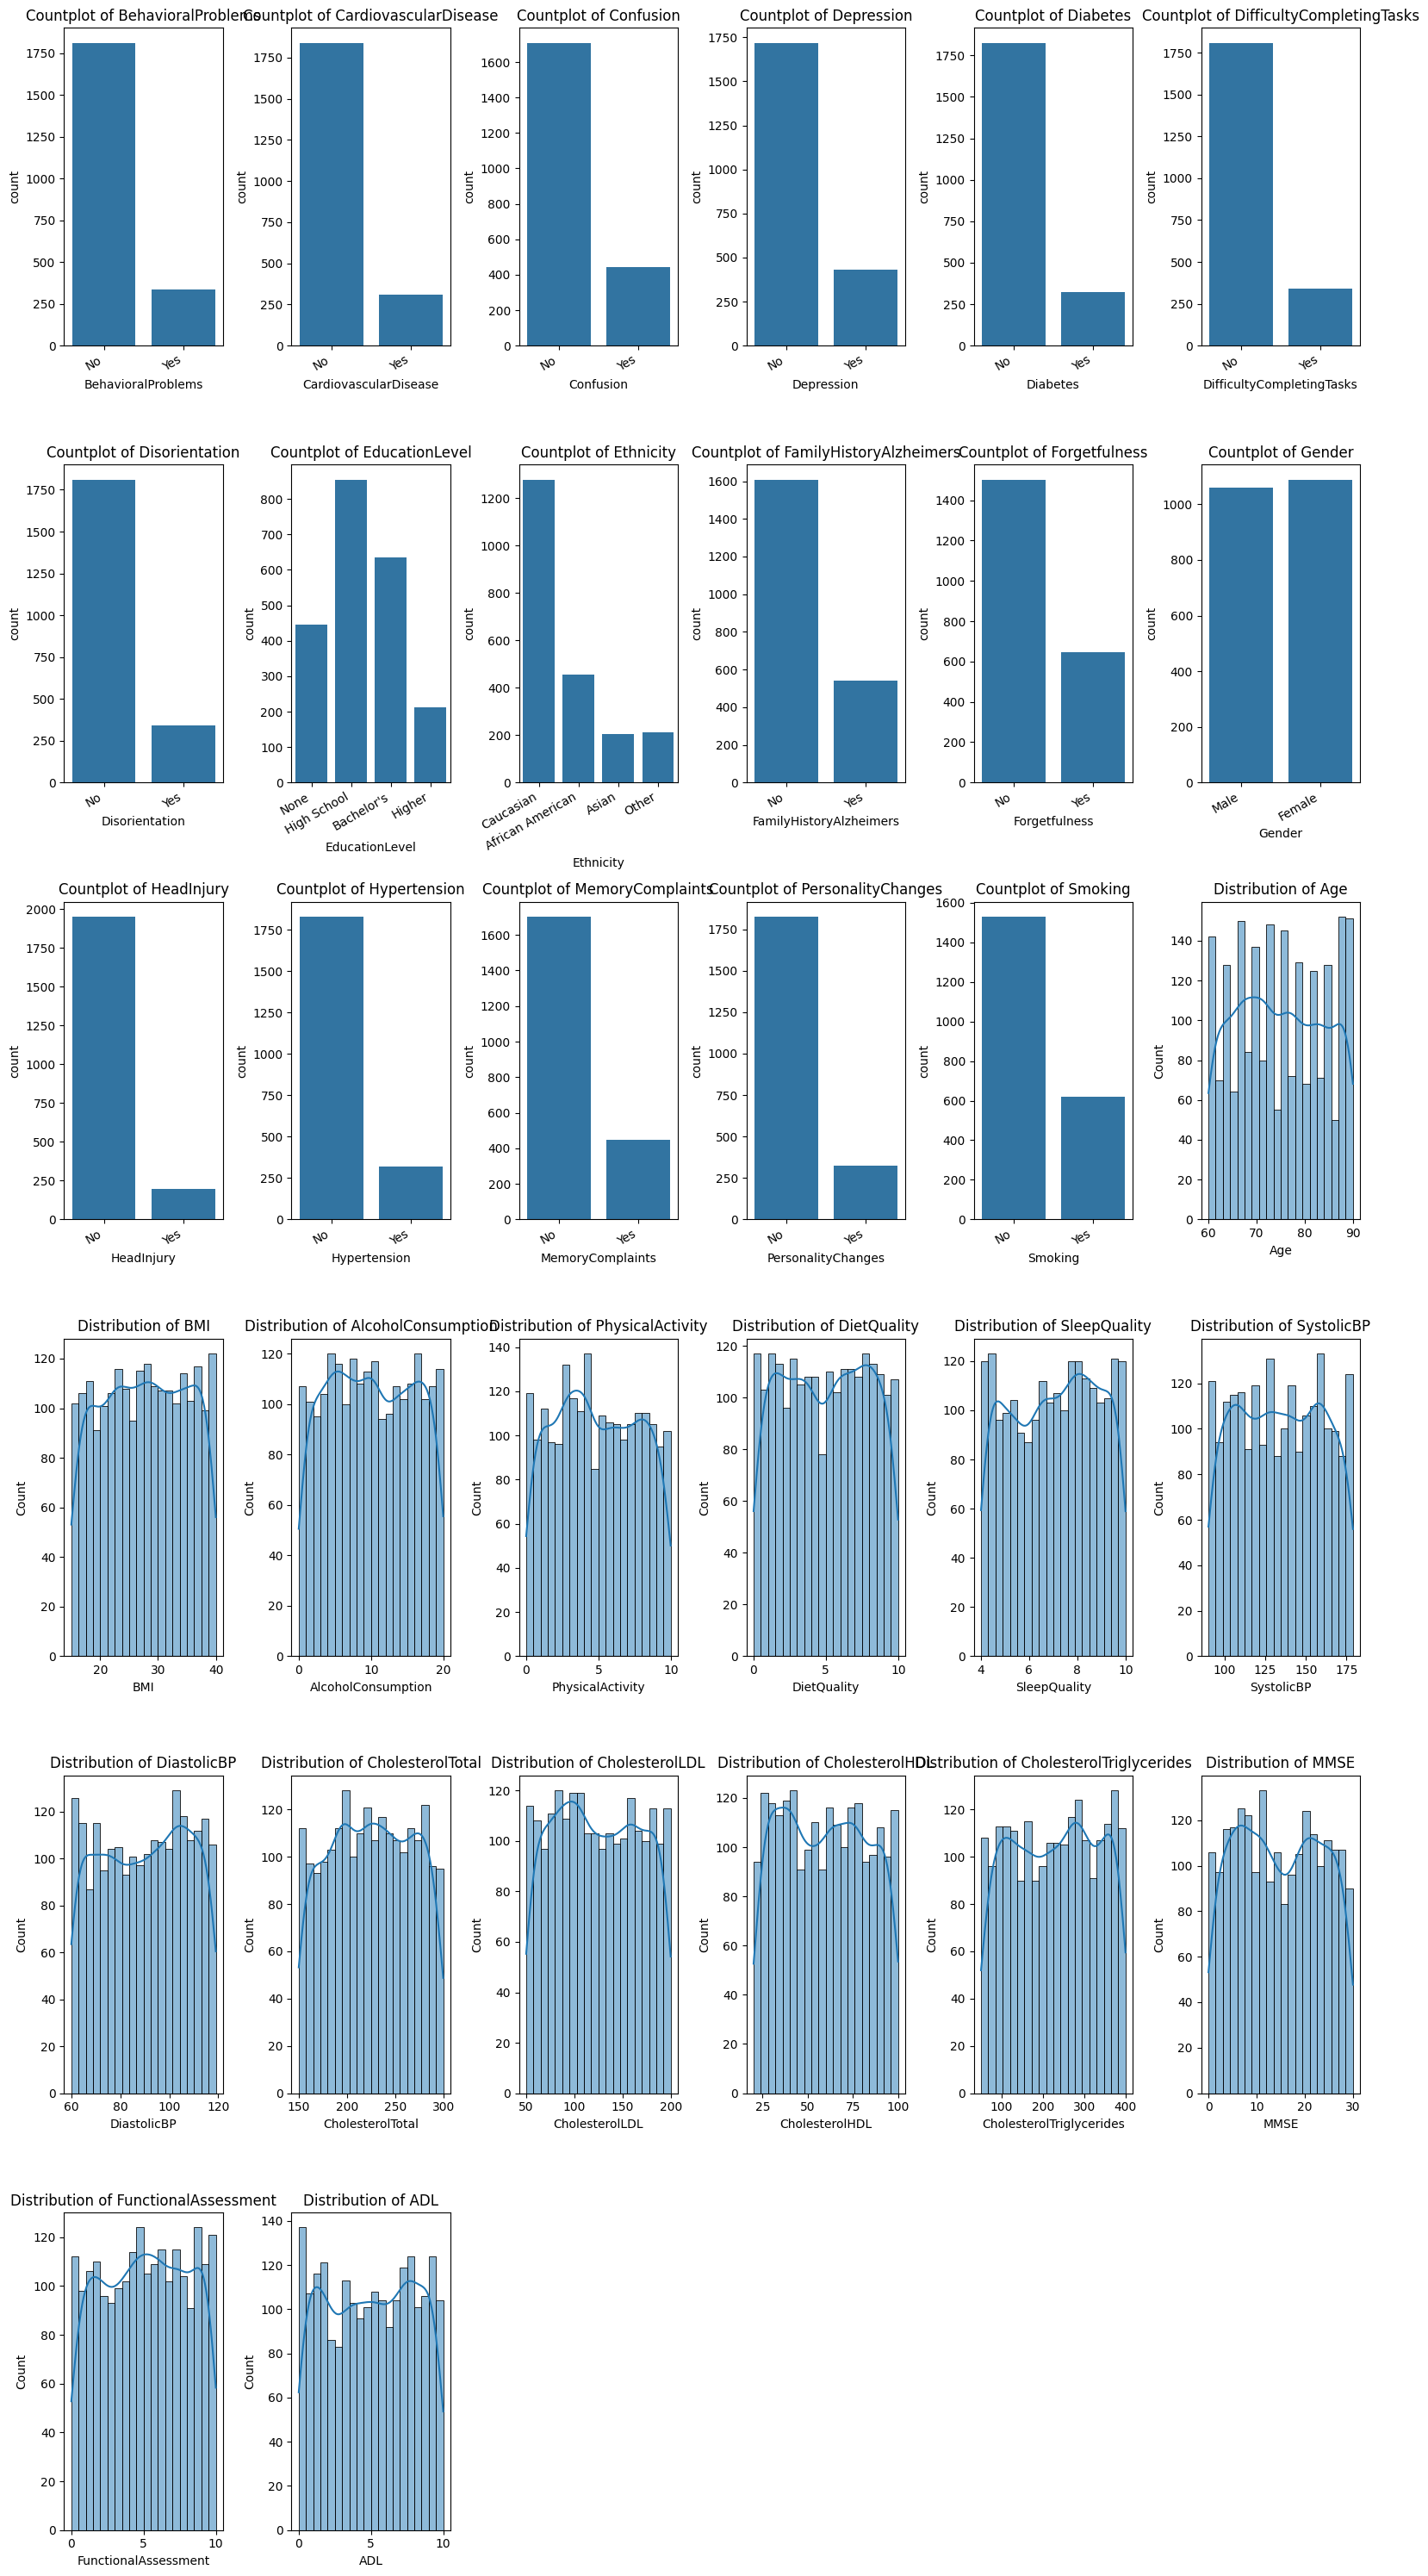

In [ ]:
#Displaying the plots and analyzing the relation between variables

all_columns = [(col, 'categorical') for col in categorical_columns] + \
              [(col, 'numerical') for col in numerical_columns]


n_cols = 6
n_rows = (len(all_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
axes = axes.flatten()

for i, (column, col_type) in enumerate(all_columns):
    if col_type == 'categorical':
        sns.countplot(data=df, x=column, ax=axes[i])
        axes[i].set_title(f'Countplot of {column}')


        if column in custom_labels:
            labels = custom_labels[column]
            ticks = range(len(labels))
            axes[i].set_xticks(ticks)
            axes[i].set_xticklabels(labels, rotation=30, ha='right')
    elif col_type == 'numerical':
        sns.histplot(data=df, x=column, kde=True, bins=20, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')


for j in range(len(all_columns), len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()


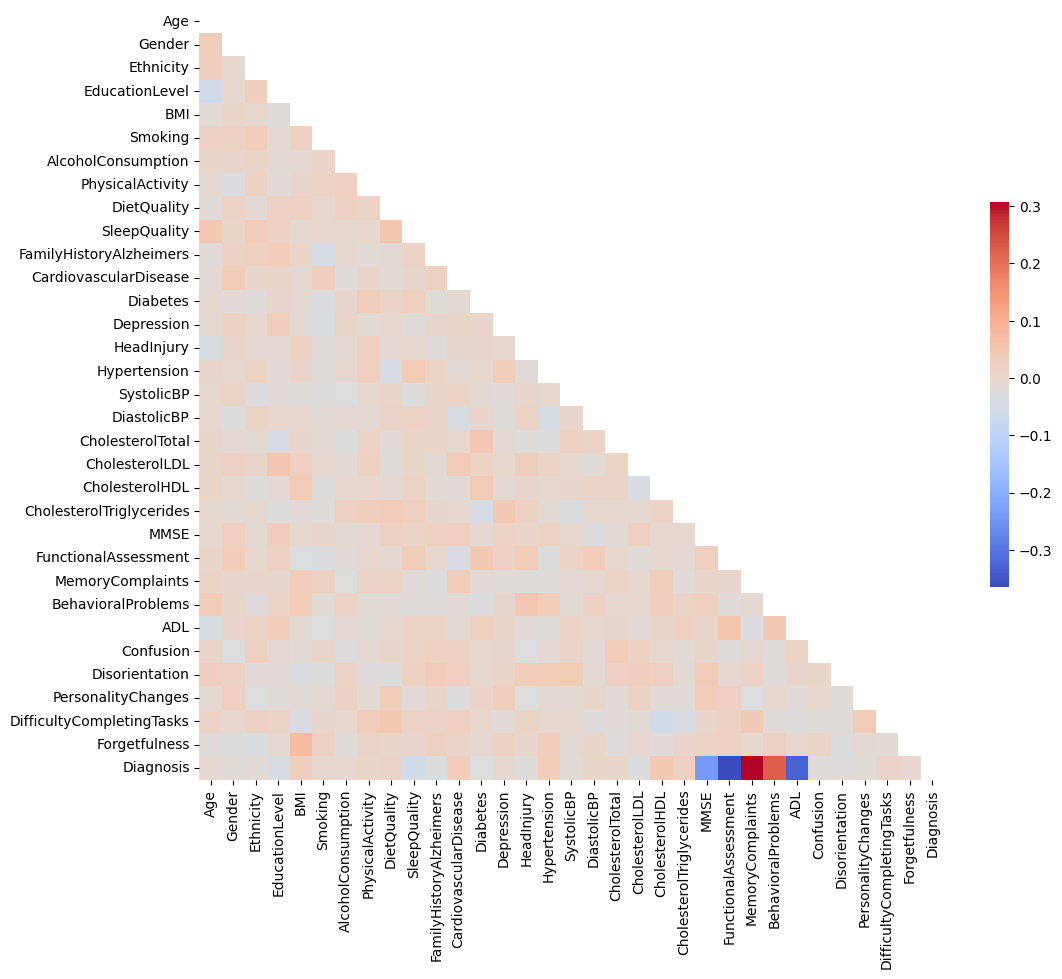

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

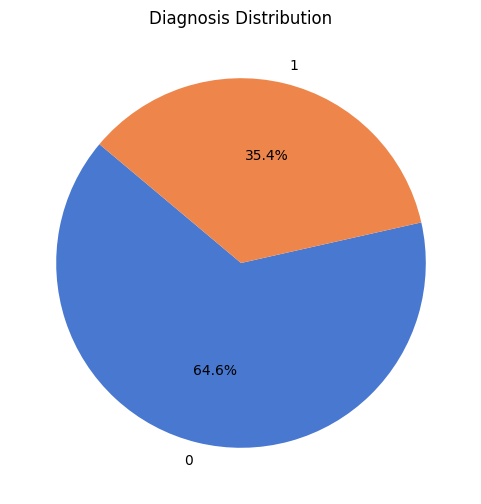

In [ ]:
categories = [0, 1]
counts = df.Diagnosis.value_counts().tolist()


colors = sns.color_palette("muted")

# Plot the pie chart with the counts of each response category
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Diagnosis Distribution')
plt.show()

In [ ]:
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

df_labeled = df.copy()
for column, labels in custom_labels.items():
    df_labeled[column] = df[column].map(dict(enumerate(labels)))
    df_labeled[column] = df_labeled[column].astype('category',copy=False)

# Dummy encode the categorical features into [0,1]
df_encoded = pd.get_dummies(df_labeled, columns=categorical_columns, drop_first=True, dtype = float)
print(df_encoded.head())

   Age        BMI  AlcoholConsumption  PhysicalActivity  DietQuality  \
0   73  22.927749           13.297218          6.327112     1.347214   
1   89  26.827681            4.542524          7.619885     0.518767   
2   73  17.795882           19.555085          7.844988     1.826335   
3   74  33.800817           12.209266          8.428001     7.435604   
4   89  20.716974           18.454356          6.310461     0.795498   

   SleepQuality  SystolicBP  DiastolicBP  CholesterolTotal  CholesterolLDL  \
0      9.025679         142           72        242.366840       56.150897   
1      7.151293         115           64        231.162595      193.407996   
2      9.673574          99          116        284.181858      153.322762   
3      8.392554         118          115        159.582240       65.366637   
4      5.597238          94          117        237.602184       92.869700   

   CholesterolHDL  CholesterolTriglycerides       MMSE  FunctionalAssessment  \
0       33.682563 

In [ ]:
# spliting data
X = df_encoded.drop(columns = ['Diagnosis'])
y = df_encoded['Diagnosis']

min_max_scaler = MinMaxScaler()
# Option 1: fit min_max scaler on all data before splitting (why not?)
# X = min_max_scaler.fit_transform(X)

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

# Option 2: fit min_max scaler on training data and transform test data (prevents data leakage)
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

Accuracy :  83.02%
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       277
           1       0.80      0.70      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430



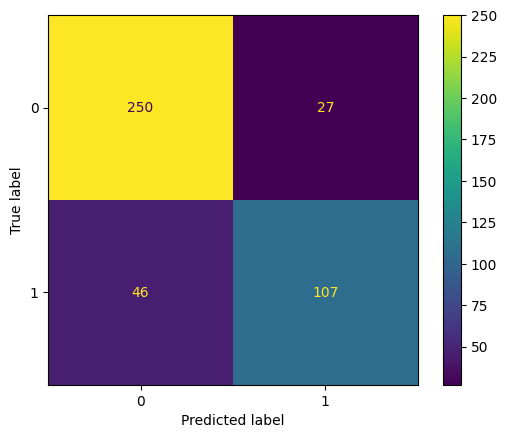

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,y_pred)))

# Classification report
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n {report}")

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       277
           1       0.80      0.70      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430

Accuracy: 0.836 (0.023)


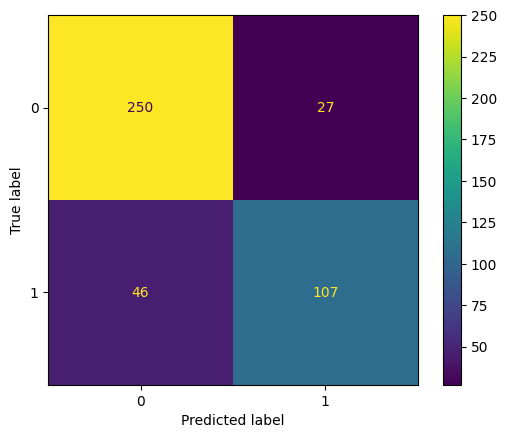

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# Define the cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

X = min_max_scaler.fit_transform(X)

# Evaluate the model using cross-validation
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

report = classification_report(y_test, y_pred)
print(f"Classification Report:\n {report}")

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
# Print the results
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

In [ ]:
for k in [3, 5, 10,12]:
    cv = RepeatedKFold(n_splits=k, n_repeats=5, random_state=42)
    scores = cross_val_score(RandomForestClassifier(), X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print(f"k={k}: Accuracy = {scores.mean():.3f} (+/- {scores.std():.3f})")

k=3: Accuracy = 0.933 (+/- 0.013)
k=5: Accuracy = 0.939 (+/- 0.013)
k=10: Accuracy = 0.943 (+/- 0.019)
k=12: Accuracy = 0.943 (+/- 0.017)


k=12: Accuracy = 0.943 (+/- 0.019)
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       277
           1       0.80      0.70      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430

Accuracy: 0.943 (0.019)


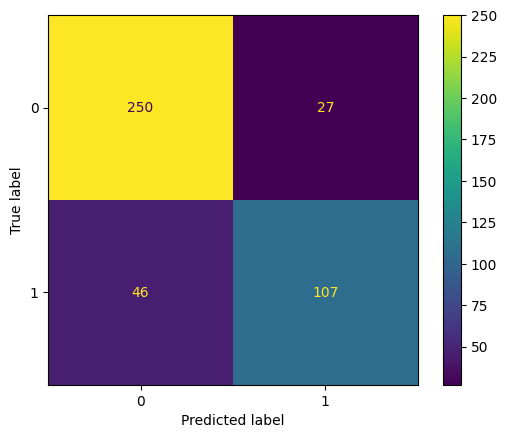

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
k=12
cv = RepeatedKFold(n_splits=k, n_repeats=5, random_state=42)
scores = cross_val_score(RandomForestClassifier(), X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(f"k={k}: Accuracy = {scores.mean():.3f} (+/- {scores.std():.3f})")
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n {report}")

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
# Print the results
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

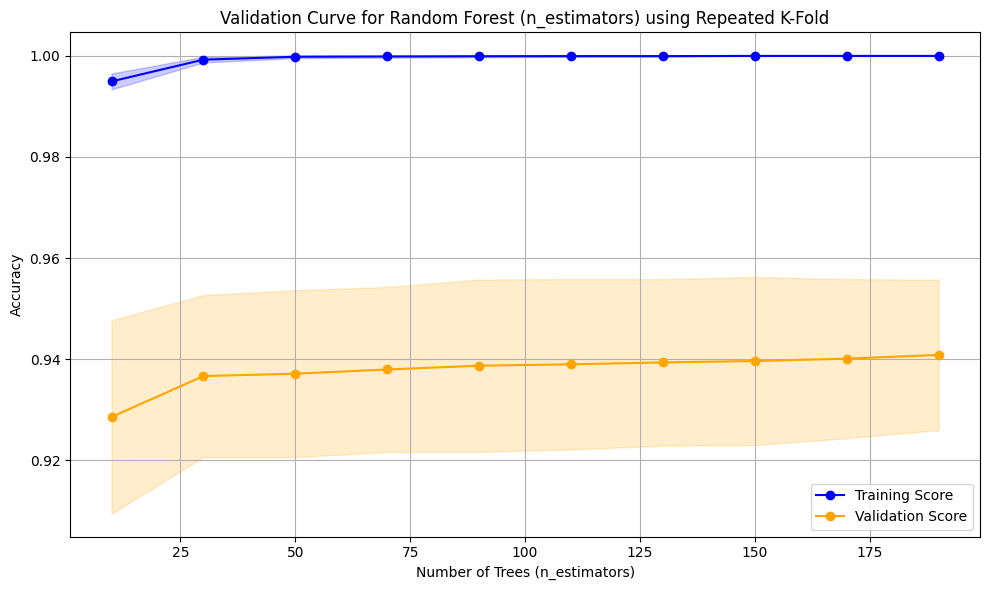

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve, RepeatedKFold
from sklearn.datasets import make_classification

# Generate synthetic dataset (replace with your dataset)
X, y = make_classification(n_samples=2150, n_features=30, random_state=42)

# Define parameter range for Random Forest
param_range = np.arange(10, 201, 20)  # Range for n_estimators

# Define Repeated K-Fold Cross-Validation
cv = RepeatedKFold(n_splits=12, n_repeats=5, random_state=42)

# Compute training and validation scores
train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=42),  # Model
    X, y,                                    # Data
    param_name="n_estimators",               # Hyperparameter to vary
    param_range=param_range,                 # Values of n_estimators
    cv=cv,                                   # Repeated K-Fold Cross-Validation
    scoring="accuracy",                      # Metric: accuracy
    n_jobs=-1                                # Use all available CPUs
)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label="Training Score", color="blue", marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(param_range, test_mean, label="Validation Score", color="orange", marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="orange")

# Add plot details
plt.title("Validation Curve for Random Forest (n_estimators) using Repeated K-Fold")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()



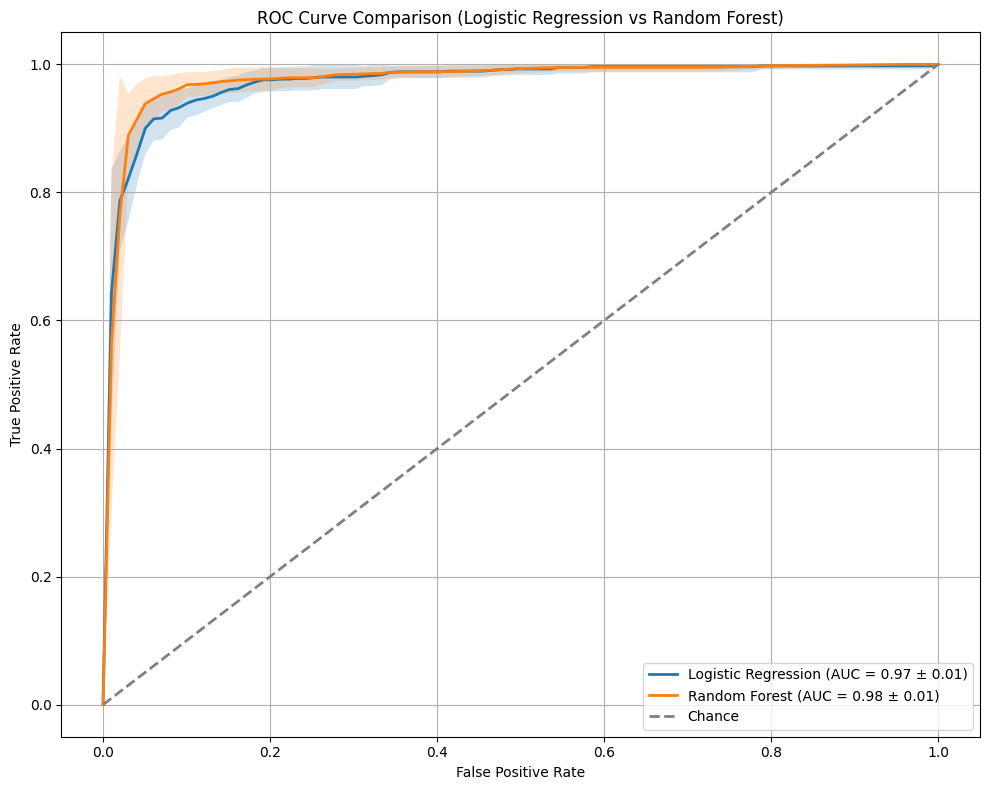

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic dataset (replace with your dataset)
X, y = make_classification(n_samples=2150, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# K-Fold Cross-Validation
k = 12
kf = KFold(n_splits=k, shuffle=True, random_state=42)


# Initialize the plot
plt.figure(figsize=(10, 8))

# Iterate through models
for model_name, model in models.items():
    mean_fpr = np.linspace(0, 1, 100)  # Interpolated FPR
    tprs = []  # Store TPRs
    aucs = []  # Store AUCs

    for train_index, test_index in kf.split(X_train):
        # Split data
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

        # Train the model
        model.fit(X_train_cv, y_train_cv)

        # Predict probabilities
        y_pred_prob = model.predict_proba(X_test_cv)[:, 1]

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test_cv, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        # Interpolate TPR for consistent FPR values
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

    # Compute mean and std TPR
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    # Plot mean ROC curve
    plt.plot(mean_fpr, mean_tpr,
             label=f"{model_name} (AUC = {mean_auc:.2f} ± {std_auc:.2f})", lw=2)

    # Plot shaded area for std deviation
    tpr_upper = np.minimum(mean_tpr + np.std(tprs, axis=0), 1)
    tpr_lower = np.maximum(mean_tpr - np.std(tprs, axis=0), 0)
    plt.fill_between(mean_fpr, tpr_lower, tpr_upper, alpha=0.2)

# Plot diagonal line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Chance", lw=2)

# Finalize the plot
plt.title("ROC Curve Comparison (Logistic Regression vs Random Forest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#saving the model for demontrating further
import pickle
with open("Alzheimer's Disease Prediction",'wb') as file:
    pickle.dump(model,file)

In [ ]:
with open("Alzheimer's Disease Prediction",'rb') as file:
    mp = pickle.load(file)

In [ ]:
mp.predict([[72,27.83,12.16,1.53,6.73,5.74,117,119,233.605,144.04,43.075,151.16,25.820,7.39,0.756,0,1,0,0,0]])

array([1])